# Flow Matching sur des mélanges de Gaussiennes (GMM)

Nous faisons quelques expériences sur le Flow Matching en utilisant comme distributions de départ et d'arrivée des mélanges de gaussiennes. Nous nous plaçons dans le cadre de *Stochastic Interpolants*, plus rigoureux que celui établi par Méta, qui ne comprend d'ailleurs pas ce cas (une des distributions devant avoir une densité par rapport à la mesure de Lebesgue à support compact). Cependant, les démonstrations de l'article sont valables lorsqu'interpolation est accompagnée d'un "lissage gausssien" du chemin de probabilités, représenté par la fonction $\gamma$ dans l'article. Nous adaptons donc les hypothèses et les démonstrations à notre cas.


## Stochastic Interpolants sans le lissage gaussien

**On ne considère que des distributions de probabilités $p$ sur un $\mathbb{R}^k$ ($k\in \mathbb{N}^*$) à densité par rapport à la mesure de Lebesgue, dont on note aussi (abusivement) $p$ la densité.**

Soient $p_0$ et $p_1$ deux distributions de probabilités sur $\mathbb{R}^d$, $\Pi$ un couplage de $(p_0, p_1)$.  On veut transporter $p_0$ vers $p_1$.

Soit également
 $$I : (t, x, y)\in [0,1]\times \mathbb{R}^d \times \mathbb{R}^d \mapsto I(t,x,y)\in\mathcal{R}^d $$ 
 une fonction $\mathcal{C}^2$ de $t$, telle que pour tout $t\in [0,1]$, $I(t, \cdot, \cdot)$ est aussi $\mathcal{C}^2$, $I(0,x,y)=$ et $I(1,x,y)=y$, et avec $C_1 >0$ tel que
$$\forall (t,x,y) \in [0,1]\times \times \mathbb{R}^d, \;\; |\partial_t I(t,x,y)| \leq C_1 |x-y|.$$

#### Hypothèses supplémentaires
On suppose $p_0, p_1$ sont de support $\mathbb{R}^d$ et de classe $\mathcal{C}^2$, que 
$$ \mathbb{E}_{X_0\sim p_0}\left[ |\nabla \log p_0(X_0) |^2 \right]<\infty \; \text{ et } \mathbb{E}_{X_1\sim p_1}\left[ |\nabla \log p_1(X_1)|^2 \right] < \infty$$
et qu'on dispose de $M_1, M_2 >0$ tels que
$$\forall t\in[0,1],\;\;  \mathbb{E}_{(X_0,X_1)\sim \Pi}\left[ |\partial_t I(t,X_0, X_1)|^4 \right] \leq M_1, \;\; \mathbb{E}_{(X_0,X_1)\sim \Pi}\left[ |\partial_t^2 I(t,X_0, X_1)|^2 \right] \leq M_2.$$

**Nous ne considérerons ici que des interpolations affines : $I(t,x,y) = b_t x + a_t y$ où $a, b : [0,1]\to [0,1] $ sont des fonctions $\mathcal{C}^2$ avec $a_0 = b_1 = 0$, $a_1=b_0=1$ et $\dot{a_t}>0$, $\dot{b_t}<0$.** 
Il faut alors : 
$$\forall (t,x,y) \in [0,1]\times \times \mathbb{R}^d, \;\; |\dot{b_t}x+\dot{a_t}y| \leq C_1 |x-y|$$
ainsi que
$$\forall t\in[0,1],\;\;  \mathbb{E}_{(X_0,X_1)\sim \Pi}\left[ |\dot{b_t}X_0+\dot{a_t}X_1)|^4 \right] \leq M_1, \;\; \mathbb{E}_{(X_0,X_1)\sim \Pi}\left[ |\ddot{b_t}X_0+\ddot{a_t}X_1)|^2 \right] \leq M_2.$$


#### Construction du champ de vitesse

Posons, pour $t\in [0,1]$, $X_t = I(t, X_0, X_1)$, où $(X_0,X_1)\sim \Pi$. La distribution de $X_t$ admet une densité, notée $p(t,\cdot)$ ou de façon équivalent $p_t$. Posons ensuite $u(t,x)$ ou $u_t(x)$ la valeur $\mathbb{E}\left[\partial_t I(t, X_0, X_1) \vert I(t, X_0, X_1) = x\right]\in\mathbb{R}^d$. 
Alors $p$ vérifie l'équation de continuité associée au champ de vitesse $u$ 
$$\forall t \in [0,1], \; x\in\mathbb{R}^d, \;\;\; \partial_t p_t(x) = -\text{div}(u_t p_t)(x),$$
et $p_t$ s'obtient en fait comme mesure image (push-forward) de $p_0$ par le flot engendré par $u$.
On appelle $u$ le champ de vitesse, et $(p_t)$ le chemin de probabilités.



## Gaussiennes : formules explicites
### Simples Gaussiennes
Supposons $(X_0, X_1) \sim \mathcal{N}(m, \Sigma)$, où $m = \begin{bmatrix} m_0 \\ m_1 \end{bmatrix} \in \mathbb{R}^{2d}$ et 
$\Sigma = \begin{bmatrix} \Sigma_{00} & \Sigma_{01}  \\  \Sigma_{10} & \Sigma_{11} \end{bmatrix} \in \mathbb{R}^{2d\times 2d}$.

Posons alors $A_t = \begin{bmatrix} b_t Id & a_t Id  \\  \dot{b_t} Id & \dot{a_t} Id \end{bmatrix} \in \mathbb{R}^{2d\times 2d}$.
Le vecteur $(\dot{X_t}, X_t)= (\dot{b_t} X_0 + \dot{a_t} X_1,b_t X_0 + a_t X_1 )$ est alors gaussien, d'espérance $m^t = A_t m$ et de matrice de covariance $\Sigma^t = A \Sigma A^T$.

Par conditionnement gaussien, 
\begin{align*}
u_t(x) &= \mathbb{E}(\dot{X_t} | X_t = x) \\
&= m^t_1 + \Sigma^t_{10}(\Sigma^t_{00})^{-1}(x-m^t_0 )   \\
&= \dot{b_t} m_0 + \dot{a_t} m_1 +  (b_t \dot{b_t} \Sigma_{00} + b_t \dot{a_t} \Sigma_{10} + a_t \dot{b_t} \Sigma_{01} + a_t \dot{a_t}\Sigma_{11})(b_t^2 \Sigma_{00} + a_t b_t (\Sigma_{01}+\Sigma_{10}) + a_t^2 \Sigma_{11})^{-1} (x- b_t m_0 - a_t m_1)  \\
\end{align*}


Avec les schedulers habituels de Flow Matching 
$$ \forall t\in[0,1], \;\; \; a_t = t, \;\; b_t=1-t, $$
on obtient :
\begin{align*}
u_t(x) &= - m_0 +  m_1 +  (-(1-t) \Sigma_{00} + (1-t) \Sigma_{01} -t \Sigma_{10} + t \Sigma_{11}) ((1-t)^2 \Sigma_{00} + t (1-t) (\Sigma_{01}+\Sigma_{10}) + t^2 \Sigma_{11})^{-1} (x- (1-t) m_0 - t m_1) \\
\end{align*}
A REECRIRE POUR SIMPLIFIER


### Mélanges de gaussiennes

Supposons maintenant  $(X_0, X_1) \sim \sum_{k=1}^L \pi_k \mathcal{N}(m^k, \Sigma^k)$, où $m^k = \begin{bmatrix} m^k_0 \\ m^k_1 \end{bmatrix} \in \mathbb{R}^{2d}$ et 
$\Sigma^k = \begin{bmatrix} \Sigma^k_{00} & \Sigma^k_{01}  \\  \Sigma^k_{10} & \Sigma^k_{11} \end{bmatrix} \in \mathbb{R}^{2d\times 2d}$. Soient $K$ variable aléatoire à valeurs dans $\{1, \cdots, L\}$, avec $\mathbb{P}(K=i)= \pi_i$. Rappelons qu'on peut peut décomposer la loi de $(X_0, X_1)$ comme 




Notons 
$$v_t^k(x) = \dot{b_t} m^k_0 + \dot{a_t} m^k_1 +  (b_t \dot{b_t} \Sigma^k_{00} + b_t \dot{a_t} \Sigma^k_{10} + a_t \dot{b_t} \Sigma^k_{01} + a_t \dot{a_t}\Sigma^k_{11})(b_t^2 \Sigma^k_{00} + a_t b_t (\Sigma^k_{01}+\Sigma^k_{10}) + a_t^2 \Sigma^k_{11})^{-1} (x- b_t m^k_0 - a_t m^k_1)$$
le champ de vitesse associé à la $k^e$ composante de notre GMM.

Or, les propriétés de l'espérance conditionnelle font que
\begin{align*}
u_t(x) &= \mathbb{E}(\dot{X_t} | X_t = x)\\
&= \mathbb{E}(\mathbb{E}(\dot{X_t} | X_t = x, K=k)|X_t = x) \\
&= \sum_{k=1}^L \mathbb{P}(K=k|X_t =x) v_t^k(x) \\
&= \sum_{k=1}^L \alpha_t^k(x) v_t^k(x) \\
\end{align*} 
où $\alpha_t^k(x)=\mathbb{P}(K=k|X_t =x)= \frac{\pi_k \mathcal{N}(x ; A_t m^k, A_t \Sigma^k A_t^T)}{\sum_{i=1}^L \pi_i \mathcal{N}(x ; A_t m^i, A_t \Sigma^i A_t^T)}$.

## Sur le code

On reprend en bonne partie le code de Stochastic Interpolants, en simplifiant certains points : on n'utilise pas de lissage gaussien, ni d'EDS pour transporter les probabilités. Par ailleurs, nous nous concentrons sur des interpolations entre mélanges de gaussiennes (GMM), éventuellement avec un couplage initial formant lui-même un mélange de gaussiennes (les lois marginales d'un GMM sont des GMM, mais un couplage de GMM peut être bien plus compliqué), pour lequel nous disposons de formules explicites. On généralise un peu sur ce point des expériences faites dans Stochastic Interpolants, où des GMM sans couplages sont considérées.




En revanche, on cherche à tester différentes fonctions de coûts, à la fois sur le type d'objet approché (le champ, un débruiteur etc...) et sur la fonction de perte en elle-même. On sait en effet pouvoir utiliser toute divergence de Bregman pour apprendre une espérance conditionnelle, ce que sont les différentes valeurs qu'on cherche à approcher. Ainsi, contrairement à Stochastic Interpolants, nous ne nous limiterons pas à la perte quadratique. 

### Code

#### Importations etc

In [1]:
import torch
import sys
import matplotlib as mpl
from matplotlib import pyplot as plt
from torch import vmap
import seaborn as sns
import numpy as np
from math import pi
import time
from torch import nn, Tensor


In [2]:
## nice defaults
%matplotlib inline
mpl.rcParams['axes.grid']  = True
mpl.rcParams['axes.grid.which']  = 'both'
mpl.rcParams['xtick.minor.visible']  = True
mpl.rcParams['ytick.minor.visible']  = True
mpl.rcParams['xtick.minor.visible']  = True
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['grid.color'] = '0.8'
mpl.rcParams['grid.alpha'] = '0.5'
mpl.rcParams['figure.figsize'] = (8, 4)
mpl.rcParams['figure.titlesize'] = 12.5
mpl.rcParams['font.size'] = 12.5
mpl.rcParams['legend.fontsize'] = 12.5
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['text.usetex'] = False

In [3]:
if torch.cuda.is_available():
    device = 'cuda'
    print('Using GPU.')
else:
    device = 'cpu'
    print('Using the cpu. No GPU!')

Using GPU.


#### Fonctions utiles

In [4]:
# Crée une matrice de covariance aléatoire pour le cas indépendant
def setup_random_covs(N: int, d: int):
    Cs = torch.zeros(N, d, d, device=device)
    for ii in range(N):
        C = torch.randn(d, d, device=device)/np.sqrt(d)
        Cs[ii] = (C.T @ C + 0.5*torch.eye(d, device=device)) 
    return Cs

# Crée une moyenne aléatoire 
def setup_random_means(N: int, d: int, scale: float):
    return scale*torch.randn((N, d),device=device)

In [5]:

def cov_mean_couplingGMM(K:int, d:int):
    """Donne les poids, les covariances et les moyennes pour un mélange gaussien"""
    pi = torch.softmax(torch.randn(K), dim=0).to(device)
    Cs = setup_random_covs(K, d)
    mus = setup_random_means(K, d, 5.0)
    return pi, Cs, mus

def cov_mean_independantGMM(K1:int, K2:int, d:int):
    """Donne les poids, les covariances et les moyennes pour un mélange gaussien"""
    pi1, Cs1, mus1 = cov_mean_couplingGMM(K1, d)
    pi2, Cs2, mus2 = cov_mean_couplingGMM(K2, d)
    return pi1, Cs1, mus1, pi2, Cs2, mus2

def sample_GMM(pi, Cs, mus, N:int):
    """Echantillonne un mélange gaussien : N points dans R^d"""
    d = Cs.shape[1]
    # On échantillonne les indices
    idx = torch.multinomial(pi, N, replacement=True) #les indices des gaussiennes tirés
    # On échantillonne les points
    X = torch.zeros(N, d)
    for i in range(N):
        X[i] = torch.distributions.MultivariateNormal(mus[idx[i]], Cs[idx[i]]).sample()
    return X.to(device)

from scipy.stats import multivariate_normal

def compute_alpha_t_GMM(pi, Cs, mus, x, t: float):
    """Calcul de alpha_t= (P(K=k|X_t=x))_k pour un mélange gaussien"""
    K = pi.shape[0]
    d = Cs.shape[1]
    alpha_t = torch.zeros(K, device=device)
    for k in range(K):
        alpha_t[k] = pi[k] * multivariate_normal.pdf(x.cpu().numpy(), mean=mus[k].cpu().numpy(), cov=Cs[k].cpu().numpy())
    return alpha_t / torch.sum(alpha_t)


In [22]:
class InputWrapper(torch.nn.Module):
    def __init__(self, v):
        super(InputWrapper, self).__init__()
        self.v = v
        
    def net_inp(self, t: torch.tensor,  # [1]
        x: torch.tensor   # [batch x dim]
        ) -> torch.tensor:    # [batch x (1 + dim)]
        """Concatenate time over the batch dimension."""
        inp = torch.cat((t.repeat(x.shape[0]).unsqueeze(1), x), dim = 1)
        return inp
    
    def forward(self, x, t):
        tx = self.net_inp(t,x)
        return self.v(tx)
def make_activation(act):
    if act == 'elu':
        return torch.nn.ELU()
    if act == 'leaky_relu':
        return torch.nn.LeakyReLU()
    elif act == 'elu':
        return torch.nn.ELU()
    elif act == 'relu':
        return torch.nn.ReLU()
    elif act == 'tanh':
        return torch.nn.Tanh()
    elif act =='sigmoid':
        return torch.nn.Sigmoid()
    elif act == 'softplus':
        return torch.nn.Softplus()
    elif act == 'silu':
        return torch.nn.SiLU()
    elif act == 'Sigmoid2Pi':
        class Sigmoid2Pi(torch.nn.Sigmoid):
            def forward(self, input):
                return 2*np.pi*super().forward(input) - np.pi
        return Sigmoid2Pi()
    elif act == 'none' or act is None:
        return None
    else:
        raise NotImplementedError(f'Unknown activation function {act}')

def make_fc_net(hidden_sizes, in_size, out_size, inner_act, final_act, **config):
    sizes = [in_size] + hidden_sizes + [out_size]
    net = []
    for i in range(len(sizes) - 1):
        net.append(torch.nn.Linear(
            sizes[i], sizes[i+1]))
        if i != len(sizes) - 2:
            net.append(make_activation(inner_act))
            continue
        else:
            if make_activation(final_act):
                net.append(make_activation(final_act))
                
    v_net = torch.nn.Sequential(*net)
    return InputWrapper(v_net)

In [ ]:
class Flow(nn.Module):
    def __init__(self, dim: int = 2, h: int = 64):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(dim + 1, h), nn.ELU(),
            nn.Linear(h, h), nn.ELU(),
            nn.Linear(h, h), nn.ELU(),
            nn.Linear(h, dim))
    
    def forward(self, t: Tensor, x_t: Tensor) -> Tensor:
        return self.net(torch.cat((x_t,t), -1))
    
    def step(self, x_t: Tensor, t_start: Tensor, t_end: Tensor) -> Tensor:
        t_start = t_start.view(1, 1).expand(x_t.shape[0], 1)
        
        return x_t + (t_end - t_start) * self.forward(t=t_start + (t_end - t_start) / 2, x_t= x_t + self(x_t=x_t, t=t_start) * (t_end - t_start) / 2)

In [13]:
d=2
#pi, Cs, mus = cov_mean_couplingGMM(5,2*d)
pi1, Cs1, mus1, pi2, Cs2, mus2 = cov_mean_independantGMM(1, 3, d)

In [14]:
def linear_interpolation(t: Tensor, x0: Tensor, x1: Tensor) -> Tensor:
    """Interpolation linéaire entre x0 et x1"""
    return (1 - t) * x0 + t * x1
def dt_linear_interpolation(t: Tensor, x0: Tensor, x1: Tensor) -> Tensor:
    """Interpolation linéaire entre x0 et x1"""
    return - x0 + x1


def sqrt_interpolation(t: Tensor, x0: Tensor, x1: Tensor) -> Tensor:
    """Interpolation """
    return torch.sqrt((1 - t)) * x0 + torch.sqrt(t) * x1 
def dt_sqrt_interpolation(t: Tensor, x0: Tensor, x1: Tensor) -> Tensor:
    """Interpolation """
    return -torch.pow((1 - t),-0.5) * x0 + torch.pow(t,-0.5 ) * x1 

def cos_interpolation(t: Tensor, x0: Tensor, x1: Tensor) -> Tensor:
    """Interpolation cosinus entre x0 et x1"""
    return (torch.cos(t * pi/ 2)) * x0 + (torch.sin(t * pi/ 2))*x1
def dt_cos_interpolation(t: Tensor, x0: Tensor, x1: Tensor) -> Tensor:
    """Interpolation cosinus entre x0 et x1"""
    return pi/2*((-torch.sin(t * pi/ 2)) * x0 + (torch.cos(t * pi/ 2))*x1)

In [23]:
base_lr      = 2e-3
hidden_sizes = [256, 256, 256, 256]
in_size      = (d+1)
out_size     = (d)
inner_act    = 'relu'
final_act    = 'none'
print_model  = False


flow  =make_fc_net(hidden_sizes=hidden_sizes, in_size=in_size, out_size=out_size, inner_act=inner_act, final_act=final_act).to(device)

interpolant = sqrt_interpolation
dt_interpolant = dt_sqrt_interpolation
optimizer = torch.optim.Adam(flow.parameters(), 1e-2)
loss_fn = nn.MSELoss()

for iter in range(1000):
    #x = sample_GMM(pi, Cs, mus, 100)
    x0 = sample_GMM(pi1, Cs1, mus1, 500)
    x1 = sample_GMM(pi2, Cs2, mus2, 500)
    #x0 = x[:, 0:d]
    #x1 = x[:,d:2*d]
    
    t = torch.rand( 500, device=device).unsqueeze(1)
    x_t = interpolant(t, x0, x1).to(device)
    dx_t = dt_interpolant(t, x1, x0).to(device)
    optimizer.zero_grad()
    loss_fn(flow(t=t, x_t=x_t), dx_t).backward()
    optimizer.step()
    if iter % 100 == 0:
        print(f"iter {iter} loss {loss_fn(flow(t=t, x_t=x_t), dx_t).item()}")

TypeError: forward() got an unexpected keyword argument 'x_t'

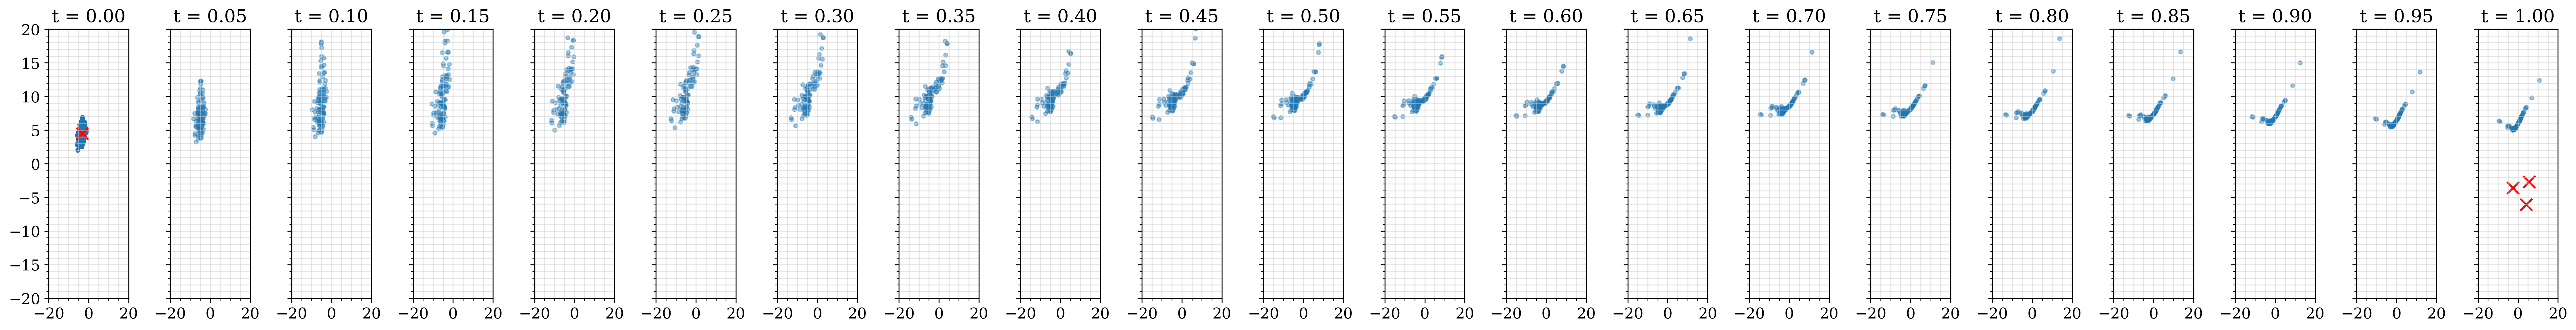

In [20]:
x = sample_GMM(pi1, Cs1, mus1, 100)[:, 0:d]
n_steps = 20
fig, axes = plt.subplots(1, n_steps + 1, figsize=(30, 4), sharex=True, sharey=True)
time_steps = torch.linspace(0, 1.0, n_steps + 1, device=device)

axes[0].scatter(x.detach()[:, 0].to('cpu'), x.detach()[:, 1].to('cpu'), s=10)
axes[0].set_title(f't = {time_steps[0]:.2f}')
axes[0].set_xlim(-20.0, 20.0)
axes[0].set_ylim(-20.0, 20.0)

for i in range(n_steps):
    x = flow.step(x_t=x, t_start=time_steps[i], t_end=time_steps[i + 1])
    axes[i + 1].scatter(x.detach()[:, 0].to('cpu'), x.detach()[:, 1].to('cpu'), alpha=0.4, s=10)
    axes[i + 1].set_title(f't = {time_steps[i + 1]:.2f}')
axes[0].scatter(mus1[:, 0].to('cpu'), mus1[:, 1].to('cpu'), s=100, alpha=pi1.to('cpu'), c='red', marker='x')
axes[n_steps].scatter(mus2[:, 0].to('cpu'), mus2[:, 1].to('cpu'), s=100,  c='red', marker='x')

plt.tight_layout()
plt.show()

### Expériences